In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline
PATH='/Users/antoniocampello/PycharmProjects/explore_the_rain_forest'

In [131]:
df=pd.read_csv(PATH+'/data/labels/train_v2.csv')

In [132]:
def show_image_and_label(i):
    testRGB = cv2.imread(PATH+'/data/train_jpg/train_'+str(i)+'.jpg')
    testRGB = cv2.cvtColor(testRGB,cv2.COLOR_BGR2RGB)
    plt.title(df['tags'][i])
    plt.imshow(testRGB)

In [133]:
# Transforming list and cleans redudancy
aux=[i.split(' ') for i in df['tags'].values]
aux=[list(set(i)) for i in aux]
df['n param'] = np.array([len(i) for i in aux])
df['tags'] = [' '.join(i) for i in aux]

In [134]:
col2=df['n param']

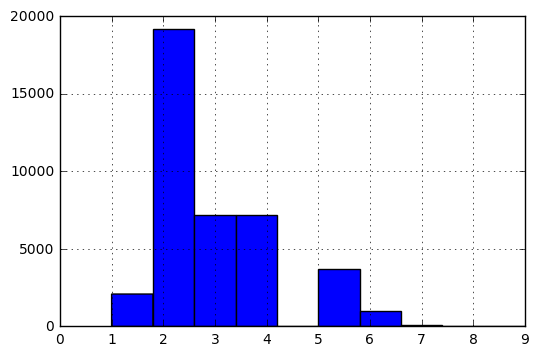

In [135]:
col2.hist()

In [149]:
Ntotal=len(df)

In [155]:
Nprimary=len(df[df['tags'].str.contains('primary')])/Ntotal
print('%% of photos showing "primary": %.2f%%'%(Nprimary*100))

% of photos showing "primary": 92.67%


In [167]:
dic_of_types= list(set((' '.join([i for i in df['tags'].values])).split()))

In [168]:
dic_of_types

['road',
 'blow_down',
 'slash_burn',
 'clear',
 'partly_cloudy',
 'haze',
 'agriculture',
 'cloudy',
 'artisinal_mine',
 'selective_logging',
 'cultivation',
 'water',
 'habitation',
 'bare_ground',
 'blooming',
 'primary',
 'conventional_mine']

In [202]:
for el in dic_of_types:
    df[el]=np.zeros(Ntotal,dtype=int)
    df.loc[df['tags'].str.contains(el),el]=1

In [203]:
df

,image_name,tags,n param,road,blow_down,slash_burn,clear,partly_cloudy,haze,agriculture,cloudy,artisinal_mine,selective_logging,cultivation,water,habitation,bare_ground,blooming,primary,conventional_mine
0,train_0,primary haze,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,train_1,clear water primary agriculture,4,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0
2,train_2,clear primary,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,train_3,clear primary,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,train_4,road clear primary agriculture habitation,5,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0
5,train_5,primary haze water,3,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
6,train_6,clear water primary cultivation agriculture,5,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0
7,train_7,primary haze,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
8,train_8,clear primary cultivation agriculture,4,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0
9,train_9,road clear primary cultivation agriculture,5,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0


In [185]:
df[df['tags'].str.contains('primary')]['primary']=1

/Users/antoniocampello/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [187]:
df.loc[df['tags'].str.contains('primary'),'primary']=1

0        1
1        1
2        1
3        1
4        1
5        1
6        1
7        1
8        1
9        1
10       1
11       1
12       0
13       1
14       0
15       1
16       1
17       1
18       1
19       1
20       1
21       1
22       1
23       1
24       1
25       1
26       0
27       1
28       1
29       1
        ..
40449    1
40450    1
40451    1
40452    1
40453    1
40454    1
40455    1
40456    1
40457    1
40458    1
40459    1
40460    1
40461    0
40462    1
40463    1
40464    1
40465    1
40466    1
40467    1
40468    1
40469    1
40470    1
40471    1
40472    1
40473    1
40474    1
40475    0
40476    1
40477    1
40478    1
Name: primary, dtype: int64